### Import the relevant packages

In [1]:
from src.dataset import SegmentationDataset , create_dataloader , train_augmentation , transform
from src.model import UNet
from src.train import train_fn
from src.eval import eval_fn
import pandas as pd
import numpy as np
import cv2
import albumentations as A
import os
import torch
import torch.nn as nn
import segmentation_models_pytorch as smp
from tqdm.notebook import tqdm as tqdm
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
import torch.optim as optim
df = pd.read_csv('data/image_label_paths.csv')

### Prepare the dataset loader

In [2]:
train_dataloader = create_dataloader(df, train=True,
                                      transform=transform, augment=train_augmentation,
                                      batch_size=4, shuffle=True, drop_last=True)
valid_dataloader = create_dataloader(df, train=False, 
                                     transform=transform, augment=None, 
                                     batch_size=4, shuffle=True, drop_last=True)

### Initialize the model and optimizer 

In [3]:
model = UNet(encoder_name='timm-efficientnet-b0', encoder_weights='imagenet',in_channels=3 , classes=1, activation=None)
model.to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=1e-2)

### Training for 25 epochs

In [4]:
best_loss = np.inf
train_lossess = []
valid_lossess = []
iou_scores = []
pixel_accuracy_scores = []
epochs = 25
for i in range(epochs):
    train_loss = train_fn(train_dataloader, model, optimizer)
    train_lossess.append(train_loss)
    valid_loss,iou , pixel_accuracy  = eval_fn(valid_dataloader, model)
    valid_lossess.append(valid_loss)
    iou_scores.append(iou)
    pixel_accuracy_scores.append(pixel_accuracy)
    print(f'Epoch: {i+1}:')
    print(f'    - Train Loss: {train_loss:.4f}')
    print(f'    - Valid Loss: {valid_loss:.4f}')
    print(f'    - IOU Score: {iou:.6f}')
    print(f'    - Pixel Accuracy: {pixel_accuracy*100:.2f}%')

    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), f'models/best_model.pth')
        print('Model Saved')
np.save(f'reports/train_losses.npy', np.array(train_lossess))
np.save(f'reports/valid_losses.npy', np.array(valid_lossess))
np.save(f'reports/iou_scores.npy', np.array(iou_scores))
np.save(f'reports/pixel_accuracy_scores.npy', np.array(pixel_accuracy_scores))

100%|██████████| 15/15 [00:18<00:00,  1.22s/it]


Epoch: 1:
    - Train Loss: 0.7378
    - Valid Loss: 0.4816
    - IOU Score: 0.463420
    - Pixel Accuracy: 93.53%
Model Saved


100%|██████████| 15/15 [00:09<00:00,  1.59it/s]


Epoch: 2:
    - Train Loss: 0.6064
    - Valid Loss: 0.4795
    - IOU Score: 0.451452
    - Pixel Accuracy: 95.99%
Model Saved


100%|██████████| 15/15 [00:05<00:00,  2.71it/s]


Epoch: 3:
    - Train Loss: 0.5743
    - Valid Loss: 0.4473
    - IOU Score: 0.486943
    - Pixel Accuracy: 97.15%
Model Saved


100%|██████████| 15/15 [00:05<00:00,  2.54it/s]


Epoch: 4:
    - Train Loss: 0.5591
    - Valid Loss: 0.4355
    - IOU Score: 0.497914
    - Pixel Accuracy: 97.10%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  3.82it/s]


Epoch: 5:
    - Train Loss: 0.5496
    - Valid Loss: 0.4493
    - IOU Score: 0.499708
    - Pixel Accuracy: 97.70%


100%|██████████| 15/15 [00:03<00:00,  4.09it/s]


Epoch: 6:
    - Train Loss: 0.5450
    - Valid Loss: 0.4087
    - IOU Score: 0.511434
    - Pixel Accuracy: 94.63%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.03it/s]


Epoch: 7:
    - Train Loss: 0.5364
    - Valid Loss: 0.4062
    - IOU Score: 0.517856
    - Pixel Accuracy: 96.24%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.07it/s]


Epoch: 8:
    - Train Loss: 0.5355
    - Valid Loss: 0.4033
    - IOU Score: 0.522005
    - Pixel Accuracy: 94.71%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.11it/s]


Epoch: 9:
    - Train Loss: 0.5272
    - Valid Loss: 0.4078
    - IOU Score: 0.524444
    - Pixel Accuracy: 95.38%


100%|██████████| 15/15 [00:03<00:00,  4.13it/s]


Epoch: 10:
    - Train Loss: 0.5278
    - Valid Loss: 0.4028
    - IOU Score: 0.517824
    - Pixel Accuracy: 95.70%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.20it/s]


Epoch: 11:
    - Train Loss: 0.5241
    - Valid Loss: 0.4031
    - IOU Score: 0.519752
    - Pixel Accuracy: 96.71%


100%|██████████| 15/15 [00:03<00:00,  4.19it/s]


Epoch: 12:
    - Train Loss: 0.5194
    - Valid Loss: 0.4196
    - IOU Score: 0.508028
    - Pixel Accuracy: 95.91%


100%|██████████| 15/15 [00:03<00:00,  4.07it/s]


Epoch: 13:
    - Train Loss: 0.5180
    - Valid Loss: 0.4038
    - IOU Score: 0.514091
    - Pixel Accuracy: 97.04%


100%|██████████| 15/15 [00:03<00:00,  4.10it/s]


Epoch: 14:
    - Train Loss: 0.5147
    - Valid Loss: 0.3986
    - IOU Score: 0.524487
    - Pixel Accuracy: 93.59%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.05it/s]


Epoch: 15:
    - Train Loss: 0.5149
    - Valid Loss: 0.3953
    - IOU Score: 0.527267
    - Pixel Accuracy: 95.01%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.15it/s]


Epoch: 16:
    - Train Loss: 0.5115
    - Valid Loss: 0.3891
    - IOU Score: 0.534952
    - Pixel Accuracy: 95.23%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  3.97it/s]


Epoch: 17:
    - Train Loss: 0.5118
    - Valid Loss: 0.3871
    - IOU Score: 0.531280
    - Pixel Accuracy: 95.96%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.17it/s]


Epoch: 18:
    - Train Loss: 0.5098
    - Valid Loss: 0.4088
    - IOU Score: 0.506443
    - Pixel Accuracy: 94.23%


100%|██████████| 15/15 [00:03<00:00,  4.13it/s]


Epoch: 19:
    - Train Loss: 0.5091
    - Valid Loss: 0.3882
    - IOU Score: 0.525235
    - Pixel Accuracy: 95.91%


100%|██████████| 15/15 [00:03<00:00,  4.13it/s]


Epoch: 20:
    - Train Loss: 0.5079
    - Valid Loss: 0.3959
    - IOU Score: 0.524105
    - Pixel Accuracy: 97.43%


100%|██████████| 15/15 [00:03<00:00,  4.16it/s]


Epoch: 21:
    - Train Loss: 0.5054
    - Valid Loss: 0.3775
    - IOU Score: 0.538982
    - Pixel Accuracy: 94.61%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  3.97it/s]


Epoch: 22:
    - Train Loss: 0.5057
    - Valid Loss: 0.3755
    - IOU Score: 0.535636
    - Pixel Accuracy: 96.35%
Model Saved


100%|██████████| 15/15 [00:03<00:00,  4.05it/s]


Epoch: 23:
    - Train Loss: 0.5032
    - Valid Loss: 0.3939
    - IOU Score: 0.532924
    - Pixel Accuracy: 95.83%


100%|██████████| 15/15 [00:03<00:00,  4.16it/s]


Epoch: 24:
    - Train Loss: 0.5058
    - Valid Loss: 0.3811
    - IOU Score: 0.541059
    - Pixel Accuracy: 95.48%


100%|██████████| 15/15 [00:03<00:00,  4.03it/s]


Epoch: 25:
    - Train Loss: 0.5039
    - Valid Loss: 0.3843
    - IOU Score: 0.534489
    - Pixel Accuracy: 97.52%


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

### Visualize the training and validation losses 

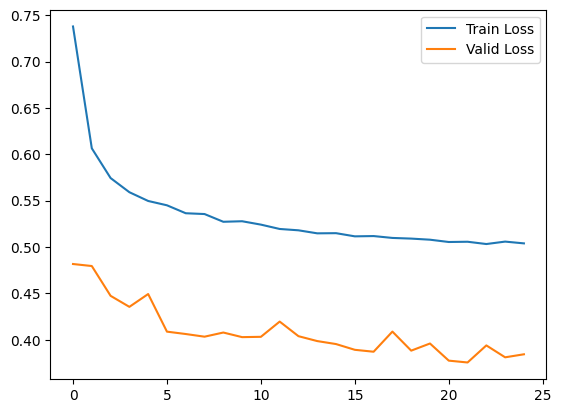

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_lossess, label='Train Loss')
plt.plot(valid_lossess, label='Valid Loss')
plt.savefig('reports/losses.png')
plt.legend()
plt.show()

### Visualize the pizel accuracy 

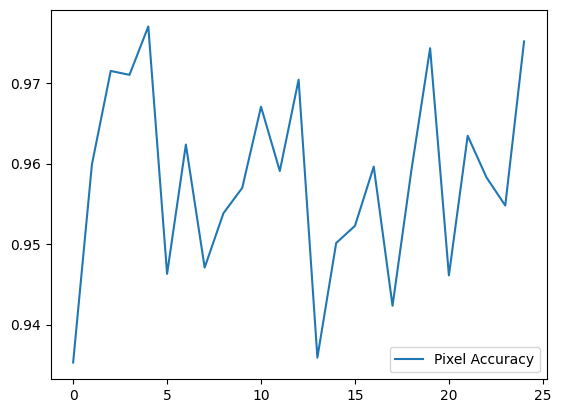

In [29]:
pixel_accuracy_list= [score.detach().cpu().numpy().tolist() for score in pixel_accuracy_scores]
plt.plot(pixel_accuracy_list, label='Pixel Accuracy')
plt.savefig('reports/pixel_accuracy.png')
plt.legend()
plt.show()


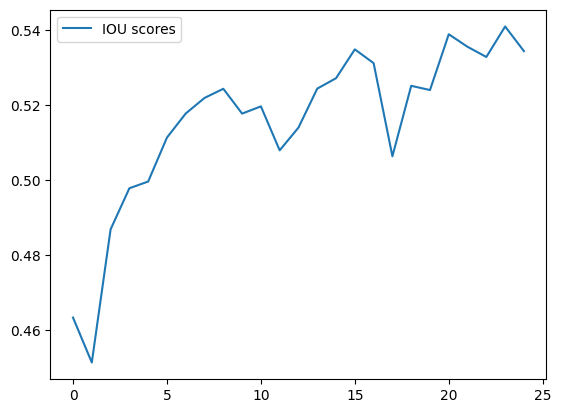

In [31]:
iou_list= [score.detach().cpu().numpy().tolist() for score in iou_scores]
plt.plot(iou_list, label='IOU scores')
plt.savefig('reports/iou.png')
plt.legend()
plt.show()